# PRUEBA TÉCNICA A2G

En esta prueba usted tendrá que responder 6 preguntas generales del dataset QAQC, las cuales deberán ser respondidas en este notebook, además tendrá que generar gráficos en la sección visualización y finalmente seguir instrucciones para generar un reporte pdf. Usted podrá hacer uso de un número ilimitado de celdas en caso de considerarlo necesario, pero siempre bajo la pregunta correspondiente y sobre la pregunta siguiente. A usted se le ha entregado los siguientes archivos:

* map_points.json         : Puntos de la topografía de la mina
* bloques_test_2023.json  : Dataset QAQC
* polygons_290623.json    : Información de los polígonos de tronadura
* prueba_técnica_a2g.ipynb: Notebook con la prueba técnica
* assets                  : Carpeta con archivos necesarios para la generación del reporte pdf
* plots                   : Máquetas de gráficos necesarios para la sección visualización

No olvide documentar y registrar todos los cálculos que considere necesario para responder esta prueba. Recuerde que el límite de entrega es 03-07-2023 : 01:00 AM.

**IMPORTANTE**: Finalizada la prueba deberá enviar:
* Este notebook prueba_técnica_a2g.ipynb con sus respuestas.
* Las imágenes generadas de la sección "visualización"
* El reporte pdf generado en la sección "reporte pdf"

al correo hello@alert2gain.com


**Mucho Éxito!**

# Importar dependencias

In [1]:
!pip install pdfkit

In [2]:
# Dependencias necesarias para la utilización del método para generar una imagen de polígono y reporte. (Utilice pip en caso de no tener estas libreias)
import plotly.graph_objects as go
from pyproj import Proj
import pdfkit
import base64

# Todas las dependencias que usted considere necesario para esta prueba


## Variables globales

In [3]:
# Objeto para proyectar cordenadas entre sistema UTM a sistema WGS84
# Para saber más lea: https://ocefpaf.github.io/python4oceanographers/blog/2013/12/16/utm/
my_proj = Proj("+proj=utm +zone=19 +south +datum=WGS84 +units=m +no_defs")

# Paleta de colores para generar el renderizado de los polígonos en la imagen
palette_colors=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
########## Ingrese la ruta donde guardará sus imágenes ##########
path_images=r'/content/drive/MyDrive/COMPETENCIAS/PRUEBA A2G/plots'

## Funciones

**NO MODIFIQUE ESTA FUNCIÓN**

In [6]:
def create_polygons_image(dict_points_poly,topo_ref,show_fig=False,
                       width=850,height=1055,path=path_images+"graph_map.png",c=1000,
                    palette_colors=palette_colors,show_tick_labels_map=True):
    """
    Genera una imagen con un un polígono y sus sub-sectores.

    Parameters:
        dict_points_poly [dict]: diccionario que contiene como llave el prefijo de un polígono (FXX_COTA_CORRELATIVO) y como valor una lista de diccionarios, que deben
        contener una llave "x" y una llave "y",ambas conteniendo listas de los puntos que representan las coordenadas
        del polígono coordenadas UTM de un Polígono. Cada diccionario de la lista representa los puntos de un polígono en su versión completa.
        topo_ref [list]: lista de puntos que representa una topografía.
        show_fig [bool, optional]: indica si se desea mostrar la figura dibujada al terminar el proceso . Defaults to False.
        width [int, optional]: Ancho de la imagen a generar. Defaults to 850.
        height [int, optional]: Alto de la imagen a generar. Defaults to 1055.
        path [string, optional]: Ruta en donde se almacenará la imagen generada. Defaults to path_images+"graph_map.png".
        c [int, optional]: Nivel de zoom bajo el cual se generará la imagen desde los polígonos provistos. Defaults to 1000.
        palette_colors [list, optional]: Paleta de colores en formato hexadecimal utilizada para pintar los polígonos. Defaults to palette_colors.
        show_tick_labels_map [bool, optional]: Variable que controla si se muestran los labels de los ejes X e Y (coordenadas). Defaults to True.

    """

    # Nota: No modifique este código o...
    fig = go.Figure()

    total_list_x=[]
    total_list_y=[]
    for poly in dict_points_poly:
        for subpoly in dict_points_poly[poly]:
            total_list_x+=subpoly['x']
            total_list_y+=subpoly['y']

    x1 = min(total_list_x)-c
    y1 = min(total_list_y)-c

    x2 = max(total_list_x)+c
    y2 = max(total_list_y)+c

    dx = x2 - x1
    dy = y2 - y1

    p_delta = 0
    if dx > dy:
        max_delta = dx
        p_delta = max_delta - dy
        y1 = y1 - p_delta / 2
        y2 = y2 + p_delta / 2
    else:
        max_delta = dy
        p_delta = max_delta - dx
        x1 = x1 - p_delta / 2
        x2 = x2 + p_delta / 2

    poly_map = []

    for l in topo_ref:
        poly_map.append({'color': 'gray', 'poly': l, 'width': 0.5})

    for p_info in poly_map:
        x_list = []
        y_list = []

        for pt in p_info['poly']:
            x_list.append(pt[0])
            y_list.append(pt[1])

        dash_type = 'solid' if 'type' not in p_info else p_info['type']

        color = p_info['color']


        fig.add_trace(go.Scatter(
            x=x_list,
            y=y_list,
            mode="lines",
            name=f"Topo {color}",
            line=dict(
                color=p_info['color'],
                width=p_info['width'],
                dash=dash_type,
            )
        ))

    fig.update_xaxes(range=[x1, x2], zeroline=False)
    fig.update_yaxes(range=[y1, y2])


    fig.update_layout(
        width=width,
        height=height,
        paper_bgcolor='#FFFFFF',
        plot_bgcolor='#FFFFFF',
        showlegend=False,
        font=dict(
            size=12,
            color="black"
        ),
        margin=dict(
        t=10,
        b=20,
        r=10
        ),
        xaxis=dict(tickformat=".0f"),
        yaxis=dict(tickformat=".0f")
    )

    if show_tick_labels_map == False:
        fig['layout']['yaxis'].update(
            showticklabels=False
        )
        fig['layout']['xaxis'].update(
            showticklabels=False
        )
        fig['layout'].update(
            margin=dict(
                t=20,
                b=30,
                r=25,
                l=20
            ),
        )

    for ind,poly in enumerate(dict_points_poly):
        for subpoly in dict_points_poly[poly]:
            fig.add_traces(go.Scatter(x=subpoly['x'], y=subpoly['y'], fill="toself",mode='lines',line=dict(width=1,color=palette_colors[ind])))

    fig.write_image(path)

    if show_fig:
        fig.show(config={'displaylogo':False})


In [8]:
!pip install kaleido
#!pip install plotly>=4.0.0
#!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
#!chmod +x /usr/local/bin/orca
#!apt-get install xvfb libgtk2.0-0 libgconf-2-4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.8 MB/s eta 0:00:00


In [10]:
!pip install plotly kaleido --upgrade
!pip install jupyter_dash dash_cytoscape

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 37.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 104.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.6 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6


In [11]:
import plotly.graph_objects as go

In [11]:

import random
def random_float(start, end):
    return random.uniform(start, end)

# Función para generar datos sintéticos
def generate_synthetic_data(num_polygons, num_points_per_polygon):
    dict_points_poly = {}
    topo_ref = []
    for i in range(1, num_polygons+1):
        polygon_name = 'poly' + str(i)
        dict_points_poly[polygon_name] = []
        topo_ref.append([(i-1, 0), (i, 0), (i, 1), (i-1, 1)])
        for j in range(num_points_per_polygon):
            x = [random_float(i-1, i) for _ in range(4)]
            y = [random_float(0, 1) for _ in range(4)]
            dict_points_poly[polygon_name].append({'x': x, 'y': y})
    return dict_points_poly, topo_ref

# Generar 5 polígonos con 4 puntos cada uno
num_polygons = 5
num_points_per_polygon = 4
dict_points_poly, topo_ref = generate_synthetic_data(num_polygons, num_points_per_polygon)

# Llamar a la función create_polygons_image con los datos sintéticos
create_polygons_image(dict_points_poly, topo_ref, show_fig=True)

ValueError: ignored

# Contexto

### Contexto General de los datos de bloques, (bloques_test_2023)




Este proyecto simulado, está enfocado en poder estudiar de forma conjunta las variables del proceso de perforación, explosivos, carguío y dureza, esto con el propósito de conseguir hallazgos que permitan visualizar el rendimiento actual del proceso de carguío y que se puedan tomar decisiones a futuro para que este rendimiento de carguío mejore.

En este caso particular, a usted se le entrega un set de datos que corresponde a los resultados de la evaluación del proceso completo.

Variables





Entre las variables que fueron parte del proceso de generación de datos que usted utilizará son:

*   Perforación

*   Explosivos

*   Carguío

*   Fragmentación




#### Registros de Datos

Tomando en cuenta la ubicación geográfica de la mina, nuestro set de datos representa un área que envuelve a la operación y la divide en bloques iguales para determinar el comportamiento de las variables descritas anteriormente, mediante el siguiente proceso:




* Se divide el perímetro de la mina en una cuadricula compuesta por bloques con una extensión de 4mx4m.

* Se determina qué bloques pertenecen a cada polígono de tronadura, a través de un análisis de intersección.

* Luego, consiguiendo la ubicación geográfica para las variables de estudio, se determina aquellas que se encuentran en cada bloque perteneciente a un polígono de tronadura

* En un mismo bloque podemos tener información unificada de las variables que pertenecen al bloque 4x4m, por ejemplo, de perforación y de carguío.




**Nota 1:** En los bloques puede haber información de una o más variables estudiadas, en algunos casos se puede tener bloques sin información (Se sabe a qué polígono pertenece el bloque, pero no hay ninguna variable asociada a él), en estos casos usted encontrará datos de tipo “string” en blanco, y de tipo numérico con valores “-999999”.

**Nota 2:** En un bloque puede haber más de un registro de las variables de estudio, por ejemplo, puede haber más de un ciclo, pozo o fragmentación, esto está representado en la columna de metadatos.




#### Tipos de resultados disponibles




Como se mencionó puede haber más de un registro del proceso perforación-explosivos-carguío en un bloque así que para poder tener un valor único para cada variable en cada bloque se realiza un cálculo que varía dependiendo de si el dato es real o interpolado. En el caso de los datos reales estos pueden ser (para datos reales globales o resultados por operador en un bloque).




En los datos existe una columna llamada 'data_type', que tiene dos categorías `'real_inter'` y `'real_operator`', Si se necesita estudiar los datos globales utilice `'real_inter'`, y dependiendo de si desee los valores real o interpolado solo se necesitaría las columnas con subfijo `_real` y si quisiera los datos interpolados utilice `_inter`. Para el caso de necesitar estudiar los datos referentes al operador  utilice `real_operator`.



#### Glosario sobre variables relevantes:




* 'deltaxy_real' - Delta xy real, esto esta en metros.

* 'deltaz_real'- Delta xy real, esto esta en metros.

* 'velocidad_real' - Velocidad de perforación real, esto esta en metros por hora.

* 'first_deck_diff_real' - Diferencia del primer deck real, esto esta en metros.

* 'explosive_diff_real'- Diferencia de explosivos real, esto esta en porcentaje.

* 'p80_real'- Fragmentación real, esto esta en pulgadas.

* 'tasa_exc_real'- Tasa de excavación real.

* 'explosives_real'- Cantidad de explosivos cargados en un pozo.

* 'shovelfleet' - Flotas que cargan y descargan el material en un camión.

* 'operator_name' - Los nombres del operador en formato `operator_1`,`operator_2`...

* 'pre_polygon'- El nombre del pre fijo de los polígonos de tronadura.

* 'polygon'- El nombre del polígono de tronadura en su versión completa.




Las columnas con el prefijo color tienen la información de la calidad de cada variables, más adelante se vuelve a mencionar esto. Tomar en cuenta que la columna de color de **explosives** tiene una rampa de colores.

# Lectura del dataset

In [7]:
import json

# Ruta del archivo JSON en Google Colab
file_path = '/content/drive/MyDrive/COMPETENCIAS/PRUEBA A2G/bloques_test_2023.json'

# Cargar el archivo JSON
with open(file_path, "r") as file:
    data = json.load(file)

# Acceder a los datos del archivo JSON
# Ejemplo: Imprimir el contenido del archivo JSON
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Preguntas

## 1) Con el objetivo de entender de manera general el dataset. Indique las siguientes caracteristicas:

1. Número de columnas del dataset.
2. Número de filas del dataset.
3. El tipo de dato de cada columna.

In [8]:
import pandas as pd

df = pd.DataFrame(data)

In [9]:
pd.set_option('display.max_columns', None)

df.head(5)

,_id,awhen,elevation,coord_x,coord_y,midpoint_x,midpoint_y,points_bloque,explosives_inter,explosive_diff_inter,first_deck_diff_inter,metadata_e_inter,metadata_c_inter,velocidad_inter,deltaxy_inter,deltaz_inter,metadata_p_inter,p80_inter,destination_name_inter,metadata_f_inter,shovelfleet,tasa_exc_inter,polygon,color_tasa_exc_inter,color_p80_inter,color_first_deck_diff_inter,color_explosive_diff_inter,color_deltaxy_inter,color_deltaz_inter,color_velocidad_inter,color_explosives_inter,metadata_p_real,color_velocidad_real,metadata_c_real,deltaz_real,explosives_real,p80_real,color_first_deck_diff_real,color_p80_real,deltaxy_real,color_explosives_real,color_deltaxy_real,tasa_exc_real,color_explosive_diff_real,color_tasa_exc_real,explosive_diff_real,metadata_e_real,velocidad_real,color_deltaz_real,metadata_f_real,destination_name_real,first_deck_diff_real,data_type,shoveloppaynumber_real,shohvelopname,longitude,latitude,update_time,decf_time,key,pre_polygon
0,{'$oid': '649b181778d71bf66a6827c8'},{'$date': '2023-06-27T17:10:47.265Z'},4145,941,296,447220.854124,6883839.869,"[[-69.5376586672726, -28.170097873109132], [-6...",576.588569,-1.527221,0.000000,"{""explosives"": 14, ""explosive_diff"": 14, ""firs...","{""4100XPC-AC"": 10}",27.077255,0.166473,-0.075693,"{""velocidad"": 14, ""deltaxy"": 14, ""deltaz"": 14}",0.178146,esteril,"{""p80"": 4, ""destination_name"": 4}",4100XPC-AC,7706.486907,F05_4145_058_CF_SUR,#f26363,#77ed77,#77ed77,#77ed77,#77ed77,#77ed77,#f26363,#A2BC70,,#999999,,-999999.0,-999999.0,-999999.0,#999999,#999999,-999999.0,#999999,#999999,-999999.000000,#999999,#999999,-999999.00,,-999999.0,#999999,,,-999999.0,real-inter,,,-69.537638,-28.170080,{'$date': '2023-06-27T17:09:41.312Z'},{'$date': '1970-01-01T00:00:00.000Z'},4145_941_296_F05_4145_058_CF_SUR_4100XPC-AC__r...,F05_4145_058
1,{'$oid': '649b181778d71bf66a6827dc'},{'$date': '2023-06-27T17:10:47.271Z'},4100,945,372,447236.854124,6884143.869,"[[-69.53748197464265, -28.167354403132514], [-...",-999999.000000,-999999.000000,-999999.000000,,"{""4100XPC-AC"": 34, ""L2350"": 33, ""PC-8000"": 1}",40.360637,0.255521,-0.253728,"{""velocidad"": 19, ""deltaxy"": 19, ""deltaz"": 19}",0.118322,concentradora,"{""p80"": 67, ""destination_name"": 63}",PC-5500,-999999.000000,F05_4100_025_AF_SUR,#614e4e,#f26363,#614e4e,#614e4e,#77ed77,#77ed77,#f5f564,#614e4e,,#999999,,-999999.0,-999999.0,-999999.0,#999999,#999999,-999999.0,#999999,#999999,-999999.000000,#999999,#999999,-999999.00,,-999999.0,#999999,,,-999999.0,real-inter,,,-69.537462,-28.167336,{'$date': '2023-06-27T17:09:41.312Z'},{'$date': '1970-01-01T00:00:00.000Z'},4100_945_372_F05_4100_025_AF_SUR_PC-5500__real...,F05_4100_025
2,{'$oid': '649b181778d71bf66a6827df'},{'$date': '2023-06-27T17:10:47.271Z'},4145,961,434,447300.854124,6884391.869,"[[-69.53681890213576, -28.16511834298467], [-6...",-999999.000000,-999999.000000,-999999.000000,,,-999999.000000,-999999.000000,-999999.000000,,-999999.000000,,,L2350,-999999.000000,F05_4145_066_AP_SUR,#614e4e,#614e4e,#614e4e,#614e4e,#614e4e,#614e4e,#614e4e,#614e4e,,#999999,"{""_id"": [""63c13912a5a5a16104c8b07a""], ""time_fu...",-999999.0,285.0,-999999.0,#00FF00,#999999,-999999.0,#D82600,#999999,3210.810811,#00FF00,#FFFF00,-0.14,"{""_id"": [""63d8039a12bfc01e57b1f5b6""], ""plan_na...",-999999.0,#999999,,,0.2,real-operator,15225183,"SANTANDER NOVOA ,HECTOR MANUEL",-69.536798,-28.165100,{'$date': '2023-06-27T17:09:41.312Z'},{'$date': '2023-01-09T04:50:03.000Z'},4145_961_434_F05_4145_066_AP_SUR_L2350_SANTAND...,F05_4145_066
3,{'$oid': '649b181778d71bf66a682802'},{'$date': '2023-06-27T17:10:47.284Z'},4100,949,370,447252.854124,6884135.869,"[[-69.53731936033917, -28.167427256036323], [-...",-999999.000000,-999999.000000,-999999.000000,,"{""4100XPC-AC"": 23, ""L2350"": 70, ""PC-8000"": 1}",48.988355,0.356777,-0.039991,"{""velocidad"": 22, ""deltaxy"": 22, ""deltaz"": 22}",0.103409,concentradora,"{""p80"": 57, ""destination_name"": 51}",4100XPC-AC,8972.300475,F05_4100_025_AF_SUR,#f5f564,#f26363,#

In [10]:
import numpy as np

df.replace(-999999, np.nan, inplace=True)

In [11]:
print("NUMERO DE FILAS DEL DATASET : " + str(df.shape[0]))
print("NUMERO DE COLUMNAS DEL DATASET : " + str(df.shape[1]))

NUMERO DE FILAS DEL DATASET : 51332
NUMERO DE COLUMNAS DEL DATASET : 61


In [12]:
pd.set_option('display.max_rows', None)

l=list()
for v in df:
  d=dict()
  d['VARIABLE']=v
#  d['cardinalidad']=len(train[v].unique())
  d['TIPO DE DATO']=df[v].dtype
#  d['nulos']=len(train[train[v].isna()])
#  d['nulos %']=train[v].isnull().sum() * 100 / len(train[v])
#  if d['tipo']!='object':
#    d['mean']=train[v].mean()
#    d['max']=train[v].max()
#    d['min']=train[v].min()
#    d['zeros']=len(train[train[v]==0])/len(train)

#  d['ejemplo']=','.join([str(x) for x in random.choices(train[v].unique().tolist(), k=4)])

  l.append(d)
tabla_variables=pd.DataFrame(l)
tabla_variables

,VARIABLE,TIPO DE DATO
0,_id,object
1,awhen,object
2,elevation,int64
3,coord_x,int64
4,coord_y,int64
5,midpoint_x,float64
6,midpoint_y,float64
7,points_bloque,object
8,explosives_inter,float64
9,explosive_diff_inter,float64


## 2) ¿Qué polígono ha registrado la fragmentación más alta en la mina?
(nombre columna fragmentación: p80_real)

In [13]:
max_index = df['p80_real'].idxmax()

max_p80_real = df.loc[max_index, 'p80_real']
polygon_with_max_p80_real = df.loc[max_index, 'polygon']

print("LA FRAGMENTACIÓN MAS ALTA EN LA MINA ES DE " + str(max_p80_real) + "'' Y CORRESPONDE AL POLÍGONO " + str(polygon_with_max_p80_real))

LA FRAGMENTACIÓN MAS ALTA EN LA MINA ES DE 1.586'' Y CORRESPONDE AL POLÍGONO F05_4100_032_AF_NOR


 ## 3)¿Cuál es el promedio de la fragmentación en la mina?

In [14]:
print("EL PROMEDIO DE FRAGMENTACIÓN DE LA MINA ES DE " + str(df['p80_real'].replace(-999999, float('nan')).mean()) + "''")

EL PROMEDIO DE FRAGMENTACIÓN DE LA MINA ES DE 0.13863461083522272''


## 4) ¿Cuál es el promedio de explosivos reales por elevación? Muestre sus resultados ordenados de manera descendente por elevación.

In [15]:
df.sample()

,_id,awhen,elevation,coord_x,coord_y,midpoint_x,midpoint_y,points_bloque,explosives_inter,explosive_diff_inter,first_deck_diff_inter,metadata_e_inter,metadata_c_inter,velocidad_inter,deltaxy_inter,deltaz_inter,metadata_p_inter,p80_inter,destination_name_inter,metadata_f_inter,shovelfleet,tasa_exc_inter,polygon,color_tasa_exc_inter,color_p80_inter,color_first_deck_diff_inter,color_explosive_diff_inter,color_deltaxy_inter,color_deltaz_inter,color_velocidad_inter,color_explosives_inter,metadata_p_real,color_velocidad_real,metadata_c_real,deltaz_real,explosives_real,p80_real,color_first_deck_diff_real,color_p80_real,deltaxy_real,color_explosives_real,color_deltaxy_real,tasa_exc_real,color_explosive_diff_real,color_tasa_exc_real,explosive_diff_real,metadata_e_real,velocidad_real,color_deltaz_real,metadata_f_real,destination_name_real,first_deck_diff_real,data_type,shoveloppaynumber_real,shohvelopname,longitude,latitude,update_time,decf_time,key,pre_polygon
12498,{'$oid': '649b18c578d71bf66a6c6665'},{'$date': '2023-06-27T17:13:41.040Z'},4100,947,368,447244.854124,6884127.869,"[[-69.53740120872074, -28.167499149750554], [-...",NaN,NaN,NaN,,"{""4100XPC-AC"": 8, ""L2350"": 21}",47.154046,0.283807,-0.097017,"{""velocidad"": 18, ""deltaxy"": 19, ""deltaz"": 19}",0.09243,concentradora,"{""p80"": 52, ""destination_name"": 50}",PC-5500,NaN,F05_4100_025_AF_SUR,#614e4e,#f26363,#614e4e,#614e4e,#77ed77,#77ed77,#77ed77,#614e4e,,#999999,,NaN,NaN,NaN,#999999,#999999,NaN,#999999,#999999,NaN,#999999,#999999,NaN,,NaN,#999999,,,NaN,real-inter,,,-69.537381,-28.167481,{'$date': '2023-06-27T17:09:41.312Z'},{'$date': '1970-01-01T00:00:00.000Z'},4100_947_368_F05_4100_025_AF_SUR_PC-5500__real...,F05_4100_025


In [16]:
df_elevation = pd.DataFrame(df.groupby('elevation').explosives_real.mean())
df_elevation.sort_values(by=['elevation'],ascending=False)

,explosives_real
elevation,
4445,379.965465
4430,710.347059
4160,800.803752
4145,446.573391
4130,693.742424
4100,NaN


## 5) ¿La fragmentación real en la mina es mayor, menor o igual a la fragmentación interpolada? Justifique su afirmación.


In [17]:
def EVALUAR_CARACTERÍSTICAS(df, FRAGMENTACIÓN_REAL, FRAGMENTACIÓN_INTERPOLADA):
    # Calcular la media de las características
    MEDIA_FRAGMENTACIÓN_REAL = df[FRAGMENTACIÓN_REAL].mean()
    MEDIA_FRAGMENTACIÓN_INTERPOLADA = df[FRAGMENTACIÓN_INTERPOLADA].mean()

    # Calcular la variación porcentual
    VARIACION = ((MEDIA_FRAGMENTACIÓN_REAL - MEDIA_FRAGMENTACIÓN_INTERPOLADA) / MEDIA_FRAGMENTACIÓN_INTERPOLADA) * 100

    # Comparar las medias y generar la respuesta
    if MEDIA_FRAGMENTACIÓN_REAL > MEDIA_FRAGMENTACIÓN_INTERPOLADA:
        RESPUESTA = f"LA FRAGMENTACIÓN REAL {FRAGMENTACIÓN_REAL} CON UNA MEDIA DE {MEDIA_FRAGMENTACIÓN_REAL:.5f}'' ES SUPERIOR A LA FRAGMENTACIÓN INTERPOLADA {FRAGMENTACIÓN_INTERPOLADA} CON UNA MEDIA DE {MEDIA_FRAGMENTACIÓN_INTERPOLADA:.5f}'' EN {VARIACION:.2f}%."
    elif MEDIA_FRAGMENTACIÓN_REAL < MEDIA_FRAGMENTACIÓN_INTERPOLADA:
        RESPUESTA = f"LA FRAGMENTACIÓN REAL {FRAGMENTACIÓN_REAL} CON UNA MEDIA DE {MEDIA_FRAGMENTACIÓN_REAL:.5f}'' ES INFERIOR A LA FRAGMENTACIÓN INTERPOLADA {FRAGMENTACIÓN_INTERPOLADA} CON UNA MEDIA DE {MEDIA_FRAGMENTACIÓN_INTERPOLADA:.5f}'' EN {VARIACION:.2f}%."
    else:
        RESPUESTA = f"LA FRAGMENTACIÓN REAL {FRAGMENTACIÓN_REAL} CON UNA MEDIA DE {MEDIA_FRAGMENTACIÓN_REAL:.5f}'' ES IGUAL A LA FRAGMENTACIÓN INTERPOLADA {FRAGMENTACIÓN_INTERPOLADA} CON UNA MEDIA DE {MEDIA_FRAGMENTACIÓN_INTERPOLADA:.5f}''."

    return RESPUESTA

In [18]:
EVALUAR_CARACTERÍSTICAS(df, 'p80_real', 'p80_inter')

"LA FRAGMENTACIÓN REAL p80_real CON UNA MEDIA DE 0.13863'' ES SUPERIOR A LA FRAGMENTACIÓN INTERPOLADA p80_inter CON UNA MEDIA DE 0.13546'' EN 2.34%."

## 6) A partir de los datos: ¿Qué relación existe entre fragmentación y tasa de excavación en la mina?
Justifique su respuesta.


FRAGMENTACION: MEDIA = 0.139,  STDV = 0.122
TASA DE EXCAVACIÓN DE LA MINA: MEDIA = 7738.894 STDV = 3574.800


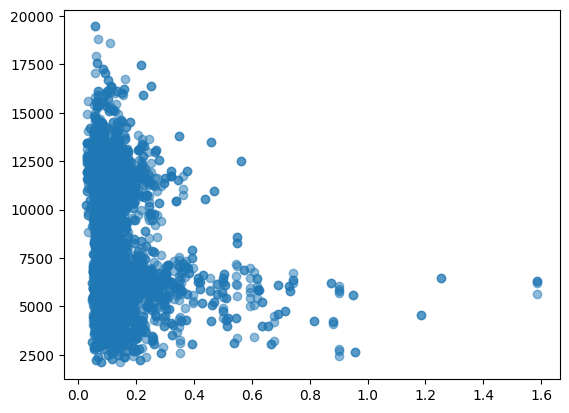

In [19]:
from numpy import mean
from numpy import std
from matplotlib import pyplot

print('FRAGMENTACION: MEDIA = %.3f,  STDV = %.3f' % (mean(df.p80_real), std(df.p80_real)))
print('TASA DE EXCAVACIÓN DE LA MINA: MEDIA = %.3f STDV = %.3f' % (mean(df.tasa_exc_real), std(df.tasa_exc_real)))

pyplot.scatter(df.p80_real, df.tasa_exc_real, alpha=0.5)
pyplot.show()

In [20]:
from numpy import cov

# Eliminar las filas con valores faltantes en las columnas de interés
df_clean = df[['p80_real', 'tasa_exc_real']].dropna()

# Obtener los valores de las columnas como matrices de NumPy
p80_real = df_clean['p80_real'].values
tasa_exc_real = df_clean['tasa_exc_real'].values

# Calcular la covarianza utilizando numpy.cov()
covariance = np.cov(p80_real, tasa_exc_real)

print(covariance)

[[ 1.46432588e-02 -8.02097840e+01]
 [-8.02097840e+01  1.07228717e+07]]


In [21]:
from scipy.stats import pearsonr

# Filtrar los valores finitos en ambas columnas
valid_indices = np.isfinite(df.p80_real) & np.isfinite(df.tasa_exc_real)
filtered_p80_real = df.p80_real[valid_indices]
filtered_tasa_exc_real = df.tasa_exc_real[valid_indices]

# Calcular la correlación de Pearson
corr, _ = pearsonr(filtered_p80_real, filtered_tasa_exc_real)
print('Pearson\'s correlation: %.3f' % corr)

Pearson's correlation: -0.202


# Visualización

En esta sección usted tendrá que crear diferentes gráficos y finalmente incorporarlos a un reporte en pdf.

## Genere los siguientes gráficos con la información entregada en el dataset

### Contexto:

#### Sobre variables de estudio
Las variables de estudios para los datos entregados son las siguientes:

* 'deltaxy_real'
* 'deltaz_real'
* 'velocidad_real'
* 'first_deck_diff_real'
* 'explosive_diff_real'
* 'p80_real'
* 'tasa_exc_real'
* 'explosives_real'

Cada variable tiene su rango calidad, por el cual se define si el valor de dicha variable es bajo, regular o bueno, y a esto se le relaciona un color, como se muestra:

- Bueno -> Verde
- Regular -> Amarillo
- Bajo -> Rojo

En las columnas de color de cada variable se encuentra dicha calidad según su color en formato hexadecimal, por ejemplo '#999999', que en los datos representa que no hay información para la variable.

#### Sobre polígono de tronadura

Un polígono de tronadura en su versión completa tiene la siguiente forma, `FXX_COTA_CORRELATIVO_IDZONA_ZONA`,

El prefijo de un polígono de tronadura es `FXX_COTA_CORRELATIVO`, ejemplo `F05_4100_032`.
Cada polígono de tronadura se divide en varias zonas, que son diferenciadas por letras A,B,C,.... además tienen dos sectores que son norte y sur, y esto se agrega al nombre del polígono por ejemplo: `F05_4100_032_AF_SUR`, `F05_4100_032_BF_SUR`,`F05_4100_032_BF_SUR`...

En el contexto de los datos dados, el prefijo del polígono `FXX_COTA_CORRELATIVO` se encuentra en la columna `pre_polygon` y el nombre de los polígonos en su versión completa se encuentra en la columna `polygon`.

Si se le pide tomar la información del prefijo de un polígono debería filtrar por pre_polygon.

## 2.1) Realice un gráfico de barras apiladas, que contenga el conteo de bloques para cada variable de estudio (no tome en cuenta explosives)tomando en cuenta su calidad. El conteo de cada calidad debe ser mostrado en cada barra. Se muestra un ejemplo de lo esperado:

<img src="plots/plot1.png">

In [22]:
df.sample(1)

,_id,awhen,elevation,coord_x,coord_y,midpoint_x,midpoint_y,points_bloque,explosives_inter,explosive_diff_inter,first_deck_diff_inter,metadata_e_inter,metadata_c_inter,velocidad_inter,deltaxy_inter,deltaz_inter,metadata_p_inter,p80_inter,destination_name_inter,metadata_f_inter,shovelfleet,tasa_exc_inter,polygon,color_tasa_exc_inter,color_p80_inter,color_first_deck_diff_inter,color_explosive_diff_inter,color_deltaxy_inter,color_deltaz_inter,color_velocidad_inter,color_explosives_inter,metadata_p_real,color_velocidad_real,metadata_c_real,deltaz_real,explosives_real,p80_real,color_first_deck_diff_real,color_p80_real,deltaxy_real,color_explosives_real,color_deltaxy_real,tasa_exc_real,color_explosive_diff_real,color_tasa_exc_real,explosive_diff_real,metadata_e_real,velocidad_real,color_deltaz_real,metadata_f_real,destination_name_real,first_deck_diff_real,data_type,shoveloppaynumber_real,shohvelopname,longitude,latitude,update_time,decf_time,key,pre_polygon
30336,{'$oid': '649b19cc78d71bf66a725f52'},{'$date': '2023-06-27T17:18:04.879Z'},4145,929,304,447172.854124,6883871.869,"[[-69.53814615948467, -28.16980709915016], [-6...",NaN,NaN,NaN,,,NaN,NaN,NaN,,NaN,,,PC-8000,NaN,F05_4145_058_AF_SUR,#614e4e,#614e4e,#614e4e,#614e4e,#614e4e,#614e4e,#614e4e,#614e4e,,#999999,"{""_id"": [""63639d4f0b2797c12980b162"", ""63639d4f...",NaN,NaN,NaN,#999999,#999999,NaN,#999999,#999999,6321.95122,#999999,#00FF00,NaN,,NaN,#999999,,,NaN,real-operator,11910633,"GONZALEZ COÃ‘UECAR,LUIS FERNANDO",-69.538126,-28.169789,{'$date': '2023-06-27T17:09:41.312Z'},{'$date': '2022-10-29T20:33:17.000Z'},4145_929_304_F05_4145_058_AF_SUR_PC-8000_GONZA...,F05_4145_058


In [23]:
#df.replace('#999999', '', inplace=True)

In [24]:
df[['color_deltaxy_real','color_deltaz_real','color_velocidad_real','color_first_deck_diff_real','color_explosive_diff_real','color_p80_real','color_tasa_exc_real']].sample(5)

,color_deltaxy_real,color_deltaz_real,color_velocidad_real,color_first_deck_diff_real,color_explosive_diff_real,color_p80_real,color_tasa_exc_real
21873,#999999,#999999,#999999,#999999,#999999,#999999,#00FF00
36777,#999999,#999999,#999999,#999999,#999999,#999999,#00FF00
10927,#999999,#999999,#999999,#999999,#999999,#999999,#999999
10907,#999999,#999999,#999999,#999999,#999999,#999999,#999999
43520,#999999,#999999,#999999,#999999,#999999,#999999,#999999


In [25]:
color_deltaxy_real = pd.DataFrame(df['color_deltaxy_real'].value_counts())
color_deltaz_real = pd.DataFrame(df['color_deltaz_real'].value_counts())
color_velocidad_real = pd.DataFrame(df['color_velocidad_real'].value_counts())
color_first_deck_diff_real = pd.DataFrame(df['color_first_deck_diff_real'].value_counts())
color_explosive_diff_real = pd.DataFrame(df['color_explosive_diff_real'].value_counts())
color_p80_real = pd.DataFrame(df['color_p80_real'].value_counts())
color_tasa_exc_real = pd.DataFrame(df['color_tasa_exc_real'].value_counts())

In [26]:
df_stacked = pd.concat([color_deltaxy_real,color_deltaz_real,color_velocidad_real,color_first_deck_diff_real,color_explosive_diff_real,color_p80_real, color_tasa_exc_real], ignore_index=False, axis=1).iloc[1:,:]

In [27]:
df_stacked = df_stacked.T
df_stacked = df_stacked.rename(columns={'#00FF00': 'Bueno', '#FFFF00': 'Regular', '#FF0000': 'Bajo'})
df_stacked

,Bueno,Regular,Bajo
color_deltaxy_real,1888,477,380
color_deltaz_real,2472,217,38
color_velocidad_real,1098,1038,552
color_first_deck_diff_real,1862,12,43
color_explosive_diff_real,1422,129,323
color_p80_real,1540,289,2637
color_tasa_exc_real,8164,4750,1398


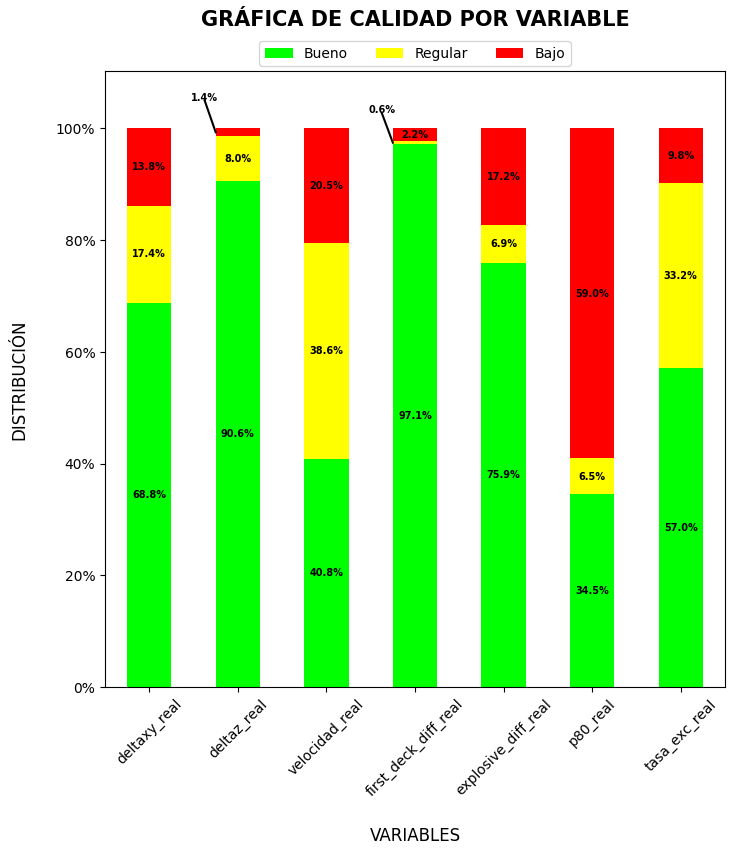

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

colors = ['#00FF00', '#FFFF00', '#FF0000']
variables=['deltaxy_real','deltaz_real','velocidad_real','first_deck_diff_real','explosive_diff_real','p80_real','tasa_exc_real']

sum_values = df_stacked.sum(axis=1)

df_normalized = df_stacked.div(sum_values, axis=0)

ax = df_normalized.plot(kind='bar', stacked=True, color=colors, figsize=(8, 8))
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    label_position = x + width / 2, y + height + 0.01

    if height < 0.02:
        label_position = x - width / 4, y + height + 0.05
        ax.annotate('{:.1f}%'.format(height*100), xy=label_position, ha='center', color='black', weight='bold', size=7)
        ax.plot([x, label_position[0]], [y + height*0.5, label_position[1]], color='black')
    else:
        ax.annotate('{:.1f}%'.format(height*100), xy=(x + width / 2, y + height / 2), ha='center', va='center', color='black', weight='bold', size=7)

plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.06), ncol=3)
plt.title('GRÁFICA DE CALIDAD POR VARIABLE', y=1.06, size=15, fontweight='bold')
plt.xlabel("VARIABLES", labelpad=20, size=12)
plt.xticks(range(len(variables)), variables, rotation=45)
plt.ylabel("DISTRIBUCIÓN", labelpad=20, size=12)


plt.show()

### Contexto

Como se mencionó anteriormente la calidad de una variable depende de un rango de valores, en el caso de la tasa de excavación hay un rango según la flota trabajada, por ejemplo el la flota 4100XPC-AC es el siguiente:

* Bueno: Valores mayor o iguales a 10350 t/h
* Regular: Valores mayor o iguales a 8050 t/h y menores a 10350 t/h
* Bajo: Menores a 8050 t/h y mayores a 2500 t/h


## 2.2) Tomando la información del prefijo de UN POLIGONO (FXX_COTA_CORRELATIVO) (el de su elección) SOLO para la flota 4100XPC-AC. Un gráfico que muestre un boxplot con la tasa de excavación de cada operador que se encuentre en la muestra de datos tomada. Considere que los boxplot deben tener el mismo color, y además debe gráficar una linea horizontal que represente el inicio de una calidad. Se muestra un ejemplo de lo esperado:

**RECUERDE:** Está buscando la información de los operadores.

<img src="plots/plot2.png">

In [29]:
df.sample(1)

,_id,awhen,elevation,coord_x,coord_y,midpoint_x,midpoint_y,points_bloque,explosives_inter,explosive_diff_inter,first_deck_diff_inter,metadata_e_inter,metadata_c_inter,velocidad_inter,deltaxy_inter,deltaz_inter,metadata_p_inter,p80_inter,destination_name_inter,metadata_f_inter,shovelfleet,tasa_exc_inter,polygon,color_tasa_exc_inter,color_p80_inter,color_first_deck_diff_inter,color_explosive_diff_inter,color_deltaxy_inter,color_deltaz_inter,color_velocidad_inter,color_explosives_inter,metadata_p_real,color_velocidad_real,metadata_c_real,deltaz_real,explosives_real,p80_real,color_first_deck_diff_real,color_p80_real,deltaxy_real,color_explosives_real,color_deltaxy_real,tasa_exc_real,color_explosive_diff_real,color_tasa_exc_real,explosive_diff_real,metadata_e_real,velocidad_real,color_deltaz_real,metadata_f_real,destination_name_real,first_deck_diff_real,data_type,shoveloppaynumber_real,shohvelopname,longitude,latitude,update_time,decf_time,key,pre_polygon
31697,{'$oid': '649b19e178d71bf66a72bf70'},{'$date': '2023-06-27T17:18:25.004Z'},4100,962,382,447304.854124,6884183.869,"[[-69.53678752871696, -28.16699605236672], [-6...",NaN,NaN,NaN,,"{""4100XPC-AC"": 7, ""L2350"": 19, ""PC-8000"": 141}",58.745053,0.450939,-0.327911,"{""velocidad"": 17, ""deltaxy"": 17, ""deltaz"": 17}",NaN,,,4100XPC-AC,12381.513791,F05_4100_032_AF_NOR,#77ed77,#614e4e,#614e4e,#614e4e,#f5f564,#77ed77,#77ed77,#614e4e,,#999999,,NaN,NaN,NaN,#999999,#999999,NaN,#999999,#999999,NaN,#999999,#999999,NaN,,NaN,#999999,,,NaN,real-inter,,,-69.536767,-28.166978,{'$date': '2023-06-27T17:09:41.312Z'},{'$date': '1970-01-01T00:00:00.000Z'},4100_962_382_F05_4100_032_AF_NOR_4100XPC-AC__r...,F05_4100_032


In [30]:
df.pre_polygon.value_counts()

F05_4100_025    7824
F05_4100_032    5325
F05_4100_022    5300
F05_4145_036    4385
F05_4100_026    4375
F05_4160_070    4088
F05_4145_058    3743
F06_4430_005    3440
F05_4130_046    3192
F05_4130_036    2040
F05_4130_026    1966
F05_4145_066    1965
F06_4445_002    1559
F05_4130_042    1407
F05_4145_065     723
Name: pre_polygon, dtype: int64

In [31]:
df_pre_polygon = df[(df['pre_polygon'] == 'F05_4130_026') & (df['shovelfleet'] == '4100XPC-AC') & (df['data_type'] == 'real-operator')]
df_pre_polygon.sample(1)

,_id,awhen,elevation,coord_x,coord_y,midpoint_x,midpoint_y,points_bloque,explosives_inter,explosive_diff_inter,first_deck_diff_inter,metadata_e_inter,metadata_c_inter,velocidad_inter,deltaxy_inter,deltaz_inter,metadata_p_inter,p80_inter,destination_name_inter,metadata_f_inter,shovelfleet,tasa_exc_inter,polygon,color_tasa_exc_inter,color_p80_inter,color_first_deck_diff_inter,color_explosive_diff_inter,color_deltaxy_inter,color_deltaz_inter,color_velocidad_inter,color_explosives_inter,metadata_p_real,color_velocidad_real,metadata_c_real,deltaz_real,explosives_real,p80_real,color_first_deck_diff_real,color_p80_real,deltaxy_real,color_explosives_real,color_deltaxy_real,tasa_exc_real,color_explosive_diff_real,color_tasa_exc_real,explosive_diff_real,metadata_e_real,velocidad_real,color_deltaz_real,metadata_f_real,destination_name_real,first_deck_diff_real,data_type,shoveloppaynumber_real,shohvelopname,longitude,latitude,update_time,decf_time,key,pre_polygon
10803,{'$oid': '649b18ae78d71bf66a6bc397'},{'$date': '2023-06-27T17:13:18.259Z'},4130,896,349,447040.854124,6884051.869,"[[-69.53948258388645, -28.168177007939217], [-...",NaN,NaN,NaN,,,NaN,NaN,NaN,,NaN,,,4100XPC-AC,NaN,F05_4130_026_AP_SUR,#614e4e,#614e4e,#614e4e,#614e4e,#614e4e,#614e4e,#614e4e,#614e4e,,#999999,"{""_id"": [""6384926cea42d72059250826""], ""time_fu...",NaN,NaN,NaN,#999999,#999999,NaN,#999999,#999999,8524.8,#999999,#FFFF00,NaN,,NaN,#999999,,,NaN,real-operator,11945344,"AZUA ECHEVARRIA,PEDRO ANTONIO",-69.539462,-28.168159,{'$date': '2023-06-27T17:09:41.312Z'},{'$date': '2022-11-23T19:58:49.000Z'},4130_896_349_F05_4130_026_AP_SUR_4100XPC-AC_AZ...,F05_4130_026


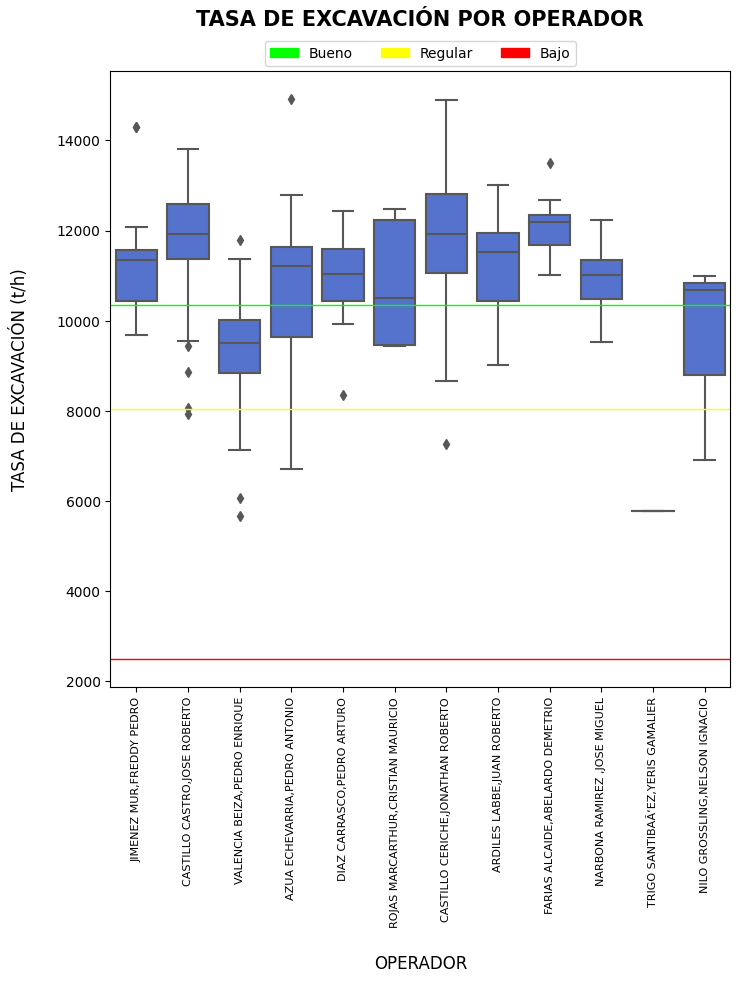

In [32]:
import seaborn as sns
import matplotlib.patches as mpatches

plt.figure(figsize=(8, 8))
sns.boxplot(y = df_pre_polygon["tasa_exc_real"], x = df_pre_polygon["shohvelopname"], color='royalblue')
#plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.06), ncol=3)
plt.title('TASA DE EXCAVACIÓN POR OPERADOR',y=1.06,  size=15, fontweight='bold')
plt.xlabel("OPERADOR", labelpad=20, size=12)
plt.xticks(size=8, rotation=90)
plt.ylabel("TASA DE EXCAVACIÓN (t/h)", labelpad=20, size=12)
plt.axhline(y=10350, color='#00FF00', linestyle='-', linewidth=1)
plt.axhline(y=8050, color='#FFFF00', linestyle='-', linewidth=1)
plt.axhline(y=2501, color='#FF0000', linestyle='-', linewidth=1)
legend_patches = [
    mpatches.Patch(color='#00FF00', linestyle='-', linewidth=1),
    mpatches.Patch(color='#FFFF00', linestyle='-', linewidth=1),
    mpatches.Patch(color='#FF0000', linestyle='-', linewidth=1)
]

plt.legend(legend_patches, ['Bueno', 'Regular', 'Bajo'], loc="upper center", bbox_to_anchor=(0.5, 1.06), ncol=3)
plt.show()

## 2.3) Tomando la información del prefijo de UN POLIGONO (FXX_COTA_CORRELATIVO) (el de su elección) SOLO para la flota 4100XPC-AC. Realice un gráfico que muestre la tasa de excavación promedio por cada operador que se encuentre en la muestra de datos tomada. Este promedio debe ser gráficado en puntos, y la información debe estar ordenada desde el peor promedio hasta el mejor promedio. Se muestra un ejemplo de lo esperado:


# Nota: No se exige que el valor de la tasa de excavación sea mostrado abajo del punto, como se muestra en la imagen, pero será considerado como puntos extras si lo realiza.

**RECUERDE:** Está buscando la información de los operadores.

<img src="plots/plot3.png">

In [33]:
df_tasa_exc_real = df[(df['pre_polygon'] == 'F05_4130_026') & (df['shovelfleet'] == '4100XPC-AC') & (df['data_type'] == 'real-operator')].groupby('shohvelopname').tasa_exc_real.mean()
df_tasa_exc_real = pd.DataFrame(df_tasa_exc_real)
df_tasa_exc_real_sorted = df_tasa_exc_real.sort_values(by=['tasa_exc_real'], ascending=True)
df_tasa_exc_real_sorted

,tasa_exc_real
shohvelopname,
"TRIGO SANTIBAÃ‘EZ,YERIS GAMALIER",5788.944724
"VALENCIA BEIZA,PEDRO ENRIQUE",9352.308280
"NILO GROSSLING,NELSON IGNACIO",9525.687130
"AZUA ECHEVARRIA,PEDRO ANTONIO",10784.381022
"ROJAS MARCARTHUR,CRISTIAN MAURICIO",10819.713790
"NARBONA RAMIREZ ,JOSE MIGUEL",10914.121613
"DIAZ CARRASCO,PEDRO ARTURO",10929.410972
"ARDILES LABBE,JUAN ROBERTO",11152.497410
"JIMENEZ MUR,FREDDY PEDRO",11417.579572


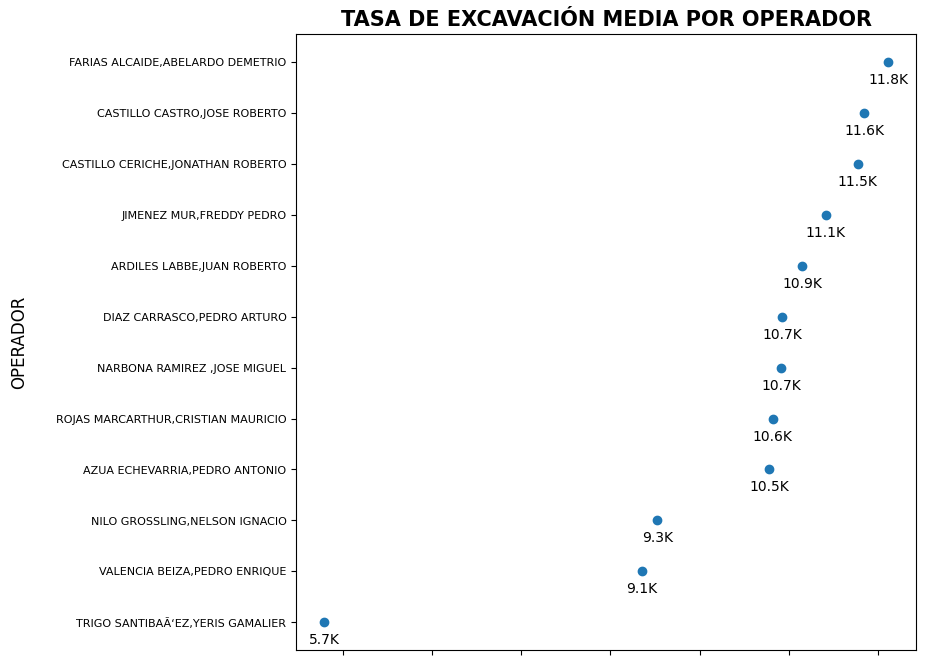

In [54]:
import humanize

labels = df_tasa_exc_real_sorted.values
x = df_tasa_exc_real_sorted.values
y = range(len(df_tasa_exc_real_sorted.index))

plt.figure(figsize=(8, 8))
plt.title('TASA DE EXCAVACIÓN MEDIA POR OPERADOR', size=15, fontweight='bold')
plt.scatter(x, y)
plt.ylabel("OPERADOR", labelpad=20, size=12)
plt.tick_params(labelbottom=False)
plt.yticks(range(len(df_tasa_exc_real_sorted.index)), df_tasa_exc_real_sorted.index, size=8)

for i, label in enumerate(labels):
    value = label.item()  # Convertir el valor del ndarray a un valor escalar
    value_abbr = humanize.naturalsize(value, gnu=True)
    plt.text(x[i], y[i] - 0.35, value_abbr, ha='center', va='center')

plt.show()

## 2.4) Para este gráfico hara uso de los datos de los polígonos de tronadura, que se encuentra en el archivo `polygons_290623.json`, en la columna `ugm` se encuentran los nombres de los polígonos de tronadura (en su versión completa con zonas) y en la columna `dest_archd` se encuentran los puntos que forman el polígono.


### Se pide que tomen un prefijo de un polígono de tronadura en formato FXX_COTA_CORRELATIVO el de su elección, que se encuentre en los datos de bloques_test_2023, basada en esta muestra tomen los polígonos de tronadura en su VERSION COMPLETA. Luego, de obtenidos los nombres de los polígonos (VERSION COMPLETA)buscaran los puntos que forman estos polígonos en los datos `polygons_290623` y crearán un diccionario que contengan estos puntos que servirá de argumento para utilizar la función `create_polygons_image`, esta función creará una gráfica que pintará los polígonos tomados. Se muestra un ejemplo de lo esperado:


**Notas adicionales:**
### Ojo con lo siguiente:
* Los puntos de los polígonos están serializados.

* De los puntos de los polígonos solo necesita las coordenadas para la ubicación del punto.

* Los puntos están en versión latitud, longitud. Según la función a utilizar verifique si sirven las coordenadas así o debe transformarlas.


<img src="plots/plot4.png">

In [35]:
file_path_polygons = '/content/drive/MyDrive/COMPETENCIAS/PRUEBA A2G/polygons_290623.json'

# Cargar el archivo JSON
with open(file_path_polygons, "r") as file:
    data_polygons = json.load(file)

# Acceder a los datos del archivo JSON
# Ejemplo: Imprimir el contenido del archivo JSON
print(data_polygons)

[{'_id': {'$oid': '6213fbf15132584d5381bd22'}, 'awhen': {'$date': '2023-06-23T23:13:43.569Z'}, 'banco': '4190', 'col_poligonodiseoperf': '002', 'idtronadura': '074', 'condicionagua': 'NO', 'ugm': 'F05_4190_074_ANF', 'ugmjigsaw': 'EST', 'cut': 34, 'cuac': 5, 'cuas': 8, 'cucns': 11, 'cus_s': 19, 'culns_s': 15, 'fet': 1256, 'mo': 106, 'col_as': 15, 'tonelaje': 239156, 'densidad': 2250, 'rcuac_cut': '14%', 'chalcantita': 150, 'consumocal': 133, 'curecup': 2, 'recuperacion': 7240, 'sumasulfuros': 86, 'piritabasesulfuro': 9202, 'calcopiritabasesulfuro': 3821, 'calcosinabasesulfuro': 1662, 'tenantitabasesulfuro': 704, 'cbwi': 1345, 'cspi': 62993, 'tph': 4391, 'ib160': 1, 'dest_archd': '[[-69.53617671709361,-28.16592351325188,4190.0],[-69.53555904331677,-28.16592548792291,4190.0],[-69.53563776294662,-28.166184160498638,4190.0],[-69.53569648645433,-28.16633620996154,4190.0],[-69.53554131938589,-28.166695681582368,4190.0],[-69.53566809376206,-28.166837262090272,4190.0],[-69.53573293280661,-28.16

In [36]:
df.pre_polygon.value_counts()

F05_4100_025    7824
F05_4100_032    5325
F05_4100_022    5300
F05_4145_036    4385
F05_4100_026    4375
F05_4160_070    4088
F05_4145_058    3743
F06_4430_005    3440
F05_4130_046    3192
F05_4130_036    2040
F05_4130_026    1966
F05_4145_066    1965
F06_4445_002    1559
F05_4130_042    1407
F05_4145_065     723
Name: pre_polygon, dtype: int64

In [37]:
data_polygons = pd.DataFrame(data_polygons)
data_polygons.sample(2)

,_id,awhen,banco,col_poligonodiseoperf,idtronadura,condicionagua,ugm,ugmjigsaw,cut,cuac,cuas,cucns,cus_s,culns_s,fet,mo,col_as,tonelaje,densidad,rcuac_cut,chalcantita,consumocal,curecup,recuperacion,sumasulfuros,piritabasesulfuro,calcopiritabasesulfuro,calcosinabasesulfuro,tenantitabasesulfuro,cbwi,cspi,tph,ib160,dest_archd,dest_dxf,ugm_archd,ugm_dxf
175,{'$oid': '635973740b2797c1293e2f6e'},{'$date': '2023-06-23T21:32:48.639Z'},4445,001,013,NO,F06_4445_013_BF_NNN,EST,77,11,17,46,63,14,925,29,18,65008.0,2510.0,12%,447.0,147,7,8550,145,9284,1943,4302,580,1289,76299,4474,1.0,"[[-69.54968678682421,-28.164612871861937,4445....",[],"[[-69.54968678682421,-28.164612871861937,4445....",[]
86,{'$oid': '631267f4f08ba7334a9595b7'},{'$date': '2023-06-23T22:44:18.718Z'},4160,003,072,NO,F05_4160_072_AF_NOR,SSC,44,13,22,172,194,24,147,151,51,13720.0,2540.0,3%,50.0,146,42,8970,157,4150,4126,1391,166,1291,7668,4495,37.0,"[[-69.53730924891296,-28.169194330633132,4160....",[],"[[-69.53730924891296,-28.169194330633132,4160....",[]


In [38]:
df.data_type.value_counts()

real-inter       42768
real-operator     8564
Name: data_type, dtype: int64

In [39]:
data_polygons.shape

(517, 37)

In [40]:
data_polygons['pre_polygon'] = data_polygons['ugm'].str.extract(r'^(F\d{2}_\d{4}_\d{3})')
data_polygons.sample(2)

,_id,awhen,banco,col_poligonodiseoperf,idtronadura,condicionagua,ugm,ugmjigsaw,cut,cuac,cuas,cucns,cus_s,culns_s,fet,mo,col_as,tonelaje,densidad,rcuac_cut,chalcantita,consumocal,curecup,recuperacion,sumasulfuros,piritabasesulfuro,calcopiritabasesulfuro,calcosinabasesulfuro,tenantitabasesulfuro,cbwi,cspi,tph,ib160,dest_archd,dest_dxf,ugm_archd,ugm_dxf,pre_polygon
172,{'$oid': '63570c360b2797c12937417b'},{'$date': '2023-06-23T21:32:56.913Z'},4145,001,058,NO,F05_4145_058_BF_SUR,ZEP,53,34,41,156,197,33,135,122,1348,10266.0,2592.0,6%,134.0,183,49,9108,155,3769,1218,1327,3553,1141,7329,4929,45.0,"[[-69.53761838523717,-28.169150515293712,4145....",[],"[[-69.53761838523717,-28.169150515293712,4145....",[],F05_4145_058
504,{'$oid': '6492164f78d71bf66a784763'},{'$date': '2023-06-23T22:30:58.629Z'},4160,001,056,NO,F05_4160_056_BSF,SSD,362,15,27,158,185,177,1133,127,26,169514.0,2591.0,5%,591.0,150,35,8938,124,4434,34749,17975,1077,1168,72103,4953,18.0,"[[-69.53859123058689,-28.169198943171693,4160....",[],"[[-69.53859123058689,-28.169198943171693,4160....",[],F05_4160_056


In [151]:
pd.set_option('display.max_colwidth', None)

data_polygons_filtered = data_polygons[data_polygons['pre_polygon'] == 'F05_4100_025']
data_polygons_filtered.sample(1)

,_id,awhen,banco,col_poligonodiseoperf,idtronadura,condicionagua,ugm,ugmjigsaw,cut,cuac,cuas,cucns,cus_s,culns_s,fet,mo,col_as,tonelaje,densidad,rcuac_cut,chalcantita,consumocal,curecup,recuperacion,sumasulfuros,piritabasesulfuro,calcopiritabasesulfuro,calcosinabasesulfuro,tenantitabasesulfuro,cbwi,cspi,tph,ib160,dest_archd,dest_dxf,ugm_archd,ugm_dxf,pre_polygon
220,{'$oid': '648f797678d71bf66a6c527c'},{'$date': '2023-06-23T21:12:23.732Z'},4100,002_004,025,NO,F05_4100_025_CF_SUR,SPC,32,23,24,131,155,17,154,364,13,10.0,25.417,"2,583",NaN,9,131,30,8780,247,7102,1936,686,25,1212,5935,4652.0,"[[-69.53905925346314,-28.168436766029174,4100.0],[-69.53915027177953,-28.16848354457069,4100.0],[-69.53896833840075,-28.168734640146457,4100.0],[-69.53889135127628,-28.168653410846446,4100.0],[-69.53887887243907,-28.168588022702938,4100.0],[-69.53879143590339,-28.168486483399686,4100.0],[-69.53880060436651,-28.16845082958921,4100.0],[-69.53883789232482,-28.168430803214548,4100.0]]",[],"[[-69.53905925346314,-28.168436766029174,4100.0],[-69.53915027177953,-28.16848354457069,4100.0],[-69.53896833840075,-28.168734640146457,4100.0],[-69.53889135127628,-28.168653410846446,4100.0],[-69.53887887243907,-28.168588022702938,4100.0],[-69.53879143590339,-28.168486483399686,4100.0],[-69.53880060436651,-28.16845082958921,4100.0],[-69.53883789232482,-28.168430803214548,4100.0]]",[],F05_4100_025


In [139]:
data_polygons_filtered.shape

(7, 38)

In [152]:
data_polygons_filtered['dest_archd'] = data_polygons_filtered['dest_archd'].apply(json.loads)

<ipython-input-152-0e6e5d0a9319>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [153]:
dataframes = []

# Iterar sobre los elementos de la columna 'dest_archd'
for data in data_polygons_filtered['dest_archd']:
    # Crear un dataframe a partir de cada elemento de la lista
    df = pd.DataFrame(data)
    # Agregar el dataframe a la lista
    dataframes.append(df)

# Concatenar los dataframes en uno solo
result = pd.concat(dataframes)
#result = result.reset_index(drop=True)
result.sample(5)

,0,1,2
19,-69.537663,-28.167132,4100.0
4,-69.538253,-28.168602,4100.0
7,-69.537538,-28.166896,4100.0
4,-69.537943,-28.168197,4100.0
3,-69.538296,-28.168562,4100.0


In [180]:
result.iloc[196:,:]

,0,1,2
0,-69.538813,-28.168310,4100.0
1,-69.538609,-28.168372,4100.0
2,-69.538477,-28.168460,4100.0
3,-69.538442,-28.168472,4100.0
4,-69.538372,-28.168468,4100.0
5,-69.538354,-28.168467,4100.0
6,-69.538181,-28.168444,4100.0
7,-69.538123,-28.168460,4100.0
8,-69.538014,-28.168519,4100.0
9,-69.537882,-28.168565,4100.0


In [181]:
Poly_1 = result.iloc[0:81,:]
Poly_2 = result.iloc[81:98,:]
Poly_3 = result.iloc[98:106,:]
Poly_4 = result.iloc[106:123,:]
Poly_5 = result.iloc[123:165,:]
Poly_6 = result.iloc[165:196,:]
Poly_7 = result.iloc[196:,:]


In [223]:
result.iloc[:,0:2]

,0,1
0,-69.537719,-28.166809
1,-69.537729,-28.166826
2,-69.537702,-28.166832
3,-69.537654,-28.166838
4,-69.537619,-28.166854
5,-69.537591,-28.166868
6,-69.537562,-28.166880
7,-69.537538,-28.166896
8,-69.537517,-28.166920
9,-69.537497,-28.166938


In [252]:
dict_points_poly = {
        "F05_4100_025": [
            {"x": Poly_1[[0]].values.tolist(),
             "y": Poly_1[[1]].values.tolist()}
        ],
       "F05_4100_025": [
            {"x": Poly_2[[0]].values.tolist(),
             "y": Poly_2[[1]].values.tolist()}
        ],
        "F05_4100_025": [
            {"x": Poly_3[[0]].values.tolist(),
             "y": Poly_3[[1]].values.tolist()}
        ],
       "F05_4100_025": [
            {"x": Poly_4[[0]].values.tolist(),
             "y": Poly_4[[1]].values.tolist()}
        ],
       "F05_4100_025": [
            {"x": Poly_5[[0]].values.tolist(),
             "y": Poly_5[[1]].values.tolist()}
        ],
       "F05_4100_025": [
            {"x": Poly_6[[0]].values.tolist(),
             "y": Poly_6[[1]].values.tolist()}
        ],
       "F05_4100_025": [
            {"x": Poly_7[[0]].values.tolist(),
             "y": Poly_7[[1]].values.tolist()}
        ],

    }

In [ ]:
result_0 = result.astype(int)
result_0

In [238]:
dict_points_poly = {}

prefix = 'F05_4100_025'  # Prefijo del polígono

# Lista de puntos del polígono
polygon_points = []

# Coordenadas x e y de los puntos
x_coordinates = result[0].tolist()
y_coordinates = result[1].tolist()

dict_points_poly = {'F05_4100_025': [{'x': x_coordinates, 'y': y_coordinates}]}

In [247]:
topo_ref = [list(row) for row in result[[0, 1]].values]

# El resultado será una serie en formato de lista anidada con las coordenadas
print(topo_ref)

[[-69.53771931898572, -28.166808583153067], [-69.53772854368287, -28.166825556277228], [-69.53770165001485, -28.166831832765087], [-69.53765401057728, -28.16683781802327], [-69.5376185715854, -28.166853695216393], [-69.53759060170715, -28.16686788643888], [-69.53756168887426, -28.166880424720986], [-69.53753840064141, -28.1668962542026], [-69.53751701900171, -28.16691953107199], [-69.53749654719678, -28.166937834451343], [-69.53748081913173, -28.16697020064692], [-69.53747903669262, -28.166987602357214], [-69.53749040595696, -28.167018205577428], [-69.53751199872343, -28.167037172197485], [-69.53755228089004, -28.167055237140122], [-69.53757946517418, -28.16707086852301], [-69.53760664118614, -28.167084843288176], [-69.53763194784511, -28.16709882538586], [-69.53764790774999, -28.167112844179165], [-69.53766295781116, -28.167131836458207], [-69.5376723956849, -28.167150022436143], [-69.5376855971077, -28.167173163572333], [-69.53769127556242, -28.167187222713974], [-69.53769678951195, 

In [243]:
topo_ref

[[-69.53771931898572, -28.166808583153067],
 [-69.53772854368287, -28.166825556277228],
 [-69.53770165001485, -28.166831832765087],
 [-69.53765401057728, -28.16683781802327],
 [-69.5376185715854, -28.166853695216393],
 [-69.53759060170715, -28.16686788643888],
 [-69.53756168887426, -28.166880424720986],
 [-69.53753840064141, -28.1668962542026],
 [-69.53751701900171, -28.16691953107199],
 [-69.53749654719678, -28.166937834451343],
 [-69.53748081913173, -28.16697020064692],
 [-69.53747903669262, -28.166987602357214],
 [-69.53749040595696, -28.167018205577428],
 [-69.53751199872343, -28.167037172197485],
 [-69.53755228089004, -28.167055237140122],
 [-69.53757946517418, -28.16707086852301],
 [-69.53760664118614, -28.167084843288176],
 [-69.53763194784511, -28.16709882538586],
 [-69.53764790774999, -28.167112844179165],
 [-69.53766295781116, -28.167131836458207],
 [-69.5376723956849, -28.167150022436143],
 [-69.5376855971077, -28.167173163572333],
 [-69.53769127556242, -28.167187222713974],

In [257]:
datos_convertidos_topo = []
for punto in topo_ref:
    x = int(punto[0])
    y = int(punto[1])
    datos_convertidos_topo.append((x, y))

print(datos_convertidos_topo)

[(-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-69, -28), (-6

In [245]:
topo_ref

[[(0, 0), (1, 0), (1, 1), (0, 1)], [(1, 0), (2, 0), (2, 1), (1, 1)]]

In [236]:
#pip install -U kaleido

In [237]:
#!pip install plotly>=4.0.0
#!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
#!chmod +x /usr/local/bin/orca
#!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [250]:
dict_points_poly = {
    'poly1': [
        {'x': [0, 1, 1, 0], 'y': [0, 0, 1, 1]},
        {'x': [1, 2, 2, 1], 'y': [0, 0, 1, 1]}
    ],
    'poly2': [
        {'x': [0, 1, 1, 0], 'y': [1, 1, 2, 2]},
        {'x': [1, 2, 2, 1], 'y': [1, 1, 2, 2]}
    ]
}

In [256]:
datos = {'F05_4100_025': [{'x': [[-69.53881302272613],
    [-69.53860918527492],
    [-69.5384768949844],
    [-69.53844237370284],
    [-69.53837215958217]],
   'y': [[-28.16875571479045],
    [-28.168730465625255],
    [-28.168683244498878],
    [-28.168667615972443],
    [-28.16861466377304]]}],
 'F06_4100_025': [{'x': [[-69.53844237370284],
    [-69.5384372193046],
    [-69.53841531639393],
    [-69.53839456475926],
    [-69.53836660021375]],
   'y': [[-28.168667615972443],
    [-28.16865628231014],
    [-28.16862094615671],
    [-28.168598496383534],
    [-28.168559017580792]]}]}


datos_convertidos = {}
contador = 1
for poligono, puntos in datos.items():
    datos_convertidos['poly' + str(contador)] = []
    for punto in puntos:
        coordenadas = {'x': [], 'y': []}
        for i in range(len(punto['x'])):
            x = int(punto['x'][i][0])
            y = int(punto['y'][i][0])
            coordenadas['x'].append(x)
            coordenadas['y'].append(y)
        datos_convertidos['poly' + str(contador)].append(coordenadas)
    contador += 1

print(datos_convertidos)

{'poly1': [{'x': [-69, -69, -69, -69, -69], 'y': [-28, -28, -28, -28, -28]}], 'poly2': [{'x': [-69, -69, -69, -69, -69], 'y': [-28, -28, -28, -28, -28]}]}


In [253]:
dict_points_poly

{'F05_4100_025': [{'x': [[-69.53881302272613],
    [-69.53860918527492],
    [-69.5384768949844],
    [-69.53844237370284],
    [-69.53837215958217],
    [-69.53835354922114],
    [-69.53818145038657],
    [-69.53812263958247],
    [-69.53801357514946],
    [-69.53788201176071],
    [-69.53778115636655],
    [-69.53768542063257],
    [-69.53763634885489],
    [-69.53769208599469],
    [-69.53779628228783],
    [-69.53796174004182],
    [-69.53804913917489],
    [-69.53809932254846],
    [-69.53814713749229],
    [-69.53821762242077],
    [-69.53834167152762],
    [-69.53844700848516]],
   'y': [[-28.168310216102974],
    [-28.16837228307882],
    [-28.168459776829664],
    [-28.168472337348724],
    [-28.168468029972164],
    [-28.168466888293384],
    [-28.168444371717364],
    [-28.168459512558435],
    [-28.16851875174366],
    [-28.16856482608839],
    [-28.16858344518187],
    [-28.168588394415856],
    [-28.168509134624433],
    [-28.168481297575255],
    [-28.168437281536917],
 

In [261]:
dict_points_poly = {
    'poly1': [
        {'x': [0, 1, 1, 0], 'y': [0, 0, 1, 1]},
        {'x': [1, 2, 2, 1], 'y': [0, 0, 1, 1]}
    ],
    'poly2': [
        {'x': [0, 1, 1, 0], 'y': [1, 1, 2, 2]},
        {'x': [1, 2, 2, 1], 'y': [1, 1, 2, 2]}
    ]
}

topo_ref = [
    [(0, 0), (1, 0), (1, 1), (0, 1)],
    [(1, 0), (2, 0), (2, 1), (1, 1)]
]


In [263]:
# Función para generar un número aleatorio en un rango determinado
def random_float(start, end):
    return random.uniform(start, end)

# Función para generar datos sintéticos
def generate_synthetic_data(num_polygons, num_points_per_polygon):
    dict_points_poly = {}
    topo_ref = []
    for i in range(1, num_polygons+1):
        polygon_name = 'poly' + str(i)
        dict_points_poly[polygon_name] = []
        topo_ref.append([(i-1, 0), (i, 0), (i, 1), (i-1, 1)])
        for j in range(num_points_per_polygon):
            x = [random_float(i-1, i) for _ in range(4)]
            y = [random_float(0, 1) for _ in range(4)]
            dict_points_poly[polygon_name].append({'x': x, 'y': y})
    return dict_points_poly, topo_ref

# Generar 5 polígonos con 4 puntos cada uno
num_polygons = 5
num_points_per_polygon = 4
dict_points_poly, topo_ref = generate_synthetic_data(num_polygons, num_points_per_polygon)

# Imprimir los datos generados
print("Datos generados:")
print(dict_points_poly)
print(topo_ref)

Datos generados:
{'poly1': [{'x': [0.6891003433993123, 0.7184836358262902, 0.6752053377850361, 0.6927857247871049], 'y': [0.6597677532089886, 0.401255510684955, 0.295995537332706, 0.4952379546440634]}, {'x': [0.24295343694998528, 0.9463805025558455, 0.4352798870630441, 0.8568024783004543], 'y': [0.8555285593803572, 0.4294048185691154, 0.35024411555922663, 0.6919074226638594]}, {'x': [0.37085230972295, 0.22153230697121684, 0.6162887558078846, 0.8982306598886867], 'y': [0.42787417847043796, 0.8840419471145298, 0.08082914537383323, 0.522582927298912]}, {'x': [0.6828774331184716, 0.7862207103005837, 0.5973358403068125, 0.530939949067023], 'y': [0.26188773520568465, 0.9137732989658204, 0.9304224332053218, 0.21335989056424265]}], 'poly2': [{'x': [1.344607152424695, 1.2076024724894432, 1.9461335759840876, 1.7794188769968757], 'y': [0.8693399191807833, 0.33781887962016566, 0.30308889795162575, 0.03580511724624191]}, {'x': [1.6372281915057842, 1.3574108658585715, 1.6076259763140661, 1.217626239

In [264]:
create_polygons_image(dict_points_poly,topo_ref,show_fig=False,
                       width=850,height=1055,path=path_images+"graph_map.png",c=1000,
                    palette_colors=palette_colors,show_tick_labels_map=True)

# Generar un reporte PDF

Para generar el PDF debe instalar con pip el paquete pdfkit, adicionalmente pdfkit ocupa una librería externa llamada wkhtmltopdf la cual debe instalar y ponerla en el path de las variables de entorno.

<b>Links</b>
* <b>pdfkit</b>_ https://pypi.org/project/pdfkit/
* <b>wkhtmltopdf</b>: https://wkhtmltopdf.org/

Recuerde poner en las variables de entorno el path del binario wkhtmltopdf para que la librería lo encuentre.
Por lo general el bin se instala en "C:\Program Files\wkhtmltopdf\bin" (Windows).

In [ ]:
def generate_pdf_report(title, author, images, output = "my_report.pdf"):

    if len(images) < 4: raise Exception("Entregue al menos 4 imágenes")

    def get_img_b64(path):
        with open(path, "rb") as image_file:
            encoded_string = "data:image/png;base64," + base64.b64encode(image_file.read()).decode("utf-8")
            return encoded_string


    template_html = """
        <!DOCTYPE html>
        <html lang="en">
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>Document</title>
            <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-9ndCyUaIbzAi2FUVXJi0CjmCapSmO7SnpJef0486qhLnuZ2cdeRhO02iuK6FUUVM" crossorigin="anonymous">
        </head>
        <body>
            <div class="d-flex flex-column" style="width: 2124px; height: 1499px;">
                <div style="width: 2124px;">
                    <h1 style="margin-top: 20px; color: white; text-align:center; position: absolute; width: 2124px;">__title__</h1>
                    <img src="https://a2gclientdata.s3.us-west-2.amazonaws.com/a2g/header_entrevista_tecnica.png" width=2124 alt="">
                </div>

                <br>

                <div class="d-flex justify-content-center">
                    <div class="d-inline-flex flex-column flex-grow-1" >
                        <div class="d-flex align-items-center flex-column justify-content-center">
                            <h1 style="margin-bottom: 2px;">__title_one__</h1>
                            <img style="height: 580px;" src="__img_one__" alt="">
                        </div>

                        <div class="d-flex align-items-center flex-column justify-content-center">
                            <h1 style="margin-bottom: 2px;">__title_two__</h1>
                            <img style="height: 580px;" src="__img_two__" alt="">
                        </div>
                    </div>

                    <div class="d-inline-flex flex-column flex-grow-1" >
                        <div class="d-flex align-items-center flex-column justify-content-center">
                            <h1 style="margin-bottom: 2px;">__title_three__</h1>
                            <img style="height: 580px;" src="__img_three__" alt="">
                        </div>

                        <div class="d-flex align-items-center flex-column justify-content-center">
                            <h1 style="margin-bottom: 2px;">__title_four__</h1>
                            <img style="height: 580px;" src="__img_four__" alt="">
                        </div>
                    </div>
                </div>

                <div class="flex-grow-1"></div>

                <div style="width: 2124px;">
                    <h4  style="font-size:20px; margin-top: 10px; margin-bottom:0px ; color: white;text-align:center; position: absolute; width: 2124px;">Entrevista - Generado por __nombre__</h4>
                    <img src="https://a2gclientdata.s3.us-west-2.amazonaws.com/a2g/footer_entrevista_tecnica.png" width=2124 alt="">
                </div>
            </div>
        </body>
        </html>
    """

    template_html = template_html.replace("__title__", title)

    template_html = template_html.replace("__img_one__"     , get_img_b64(images[0]["img"]))
    template_html = template_html.replace("__img_two__"     , get_img_b64(images[1]["img"]))
    template_html = template_html.replace("__img_three__"   , get_img_b64(images[2]["img"]))
    template_html = template_html.replace("__img_four__"    , get_img_b64(images[3]["img"]))

    template_html = template_html.replace("__title_one__"     , images[0]["title"])
    template_html = template_html.replace("__title_two__"     , images[1]["title"])
    template_html = template_html.replace("__title_three__"   , images[2]["title"])
    template_html = template_html.replace("__title_four__"    , images[3]["title"])

    template_html = template_html.replace("__author__", author)

    options = {'orientation':'Landscape','page-size': 'A4', 'margin-top': '0', 'margin-right': '0', 'margin-bottom': '0', 'margin-left': '0', 'encoding': "UTF-8", 'no-outline': None}
    open("test.html","w+").write(template_html)
    res = pdfkit.from_string(template_html, output_path=output,options=options,  css="assets/bootstrap.css")
    print(res)

Ingrese las rutas de sus imágenes en la lista de diccionarios: **list_images**

In [ ]:
# img desbe ser un
list_images = [
    {
        "img"   : "assets/a2g_512.png",
        "title" : "Titulo 1"
    },
    {
        "img"   : "assets/a2g_512.png",
        "title" : "Titulo 2"
    },
    {
        "img"   : "assets/a2g_512.png",
        "title" : "Titulo 3"
    },
    {
        "img"   : "assets/a2g_512.png",
        "title" : "Titulo 4"
    }
]

In [ ]:
generate_pdf_report("mi_reporte", "Alert2Gain", list_images)